In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and merged data
# read data set from file csv
data_train_p1 = pd.read_excel("Data_Train_p1.xlsx")
data_train_p2 = pd.read_excel("Data_Train_p2.xlsx")

# merged data set 
data_train = pd.concat([data_train_p1, data_train_p2])

### Q2. Đối với cột Price, cho biết:
#### 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
#### 2. Độ lệch chuẩn của cột price?
#### 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm. Nhận xét về giá trị mean và median của tập dữ liệu.
#### 4. Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

In [18]:
# 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
# Giá cao nhất
max_price = data_train["Price"].max()
print("Giá cao nhất:", max_price)

# Giá thấp nhất
min_price = data_train["Price"].min()
print("Giá thấp nhất:", min_price)

# Giá trung bình
mean_price = data_train["Price"].mean()
print("Giá trung bình:", mean_price)

# Mức giá xuất hiện nhiều
mode_price = data_train["Price"].mode()[0]
print("Mức giá xuất hiện nhiều:", mode_price)


Giá cao nhất: 79512
Giá thấp nhất: 1759
Giá trung bình: 9087.545582178958
Mức giá xuất hiện nhiều: 10262


In [19]:
# 2. Độ lệch chuẩn của cột price?
std_price = data_train["Price"].std()
print("Độ lệch chuẩn:", std_price)


Độ lệch chuẩn: 4611.411872913706


In [32]:
# 3. Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
# Tính mean và median của cột Price
mean_price = data_train['Price'].mean()
median_price = data_train['Price'].median()
# So sánh mean và median
if mean_price > median_price:
    print("Mean lớn hơn Median, có sự lệch phải (right-skewed).")
elif mean_price < median_price:
    print("Mean nhỏ hơn Median, có sự lệch trái (left-skewed).")
else:
    print("Mean và Median gần nhau, phân phối đối xứng.")

Mean lớn hơn Median, có sự lệch phải (right-skewed).


In [26]:
# Số lượng các điểm dữ liệu trong cột "Price"
number_of_data_points = len(data_train["Price"].unique())
print(number_of_data_points)

# Số lượng các bin trong cột "Price"
import numpy as np
bins = int(1 + np.log2(number_of_data_points))
print(bins)

1870
11


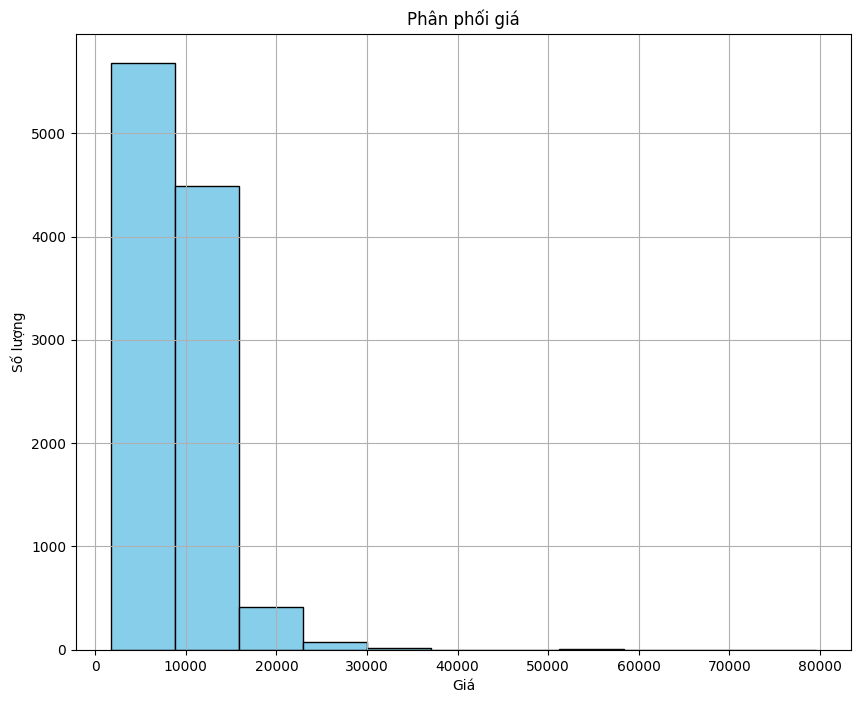

In [31]:
# Vẽ histogram của cột Price
# Vẽ đồ thị histogram
plt.figure(figsize=(10, 8))
plt.hist(data_train['Price'], bins=11, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

Khi mean lớn hơn median và có sự lệch phải (right-skewed), điều này thường cho thấy một số mẫu có giá trị cao hơn, làm tăng mean và kéo mean về phía giá trị lớn. Trong trường hợp này, một số mẫu có giá trị lớn hơn giữa tập dữ liệu, khiến mean lớn hơn median.

Như vậy, dữ liệu có xu hướng tập trung về các giá trị nhỏ, trong khi có một số ít các giá trị lớn hơn, tạo nên phân phối dữ liệu cách xa trung tâm. Điều này có thể ảnh hưởng đến tính đại diện của mean, khi mean có thể bị ảnh hưởng bởi các giá trị cao hơn.

Nhìn chung, với sự lệch phải và mean lớn hơn median, có thể kết luận rằng dữ liệu phân phối cách xa trung tâm và có một số mẫu có giá trị lớn, làm tăng mean so với median. Điều này thường thể hiện sự không đồng đều trong phân phối giá trị của tập dữ liệu.


# Visualize dữ liệu dạng bảng hoặc đồ thị: 


#### **4. Hãng máy bay nào có số chuyến bay nhiều/thấp nhất?**

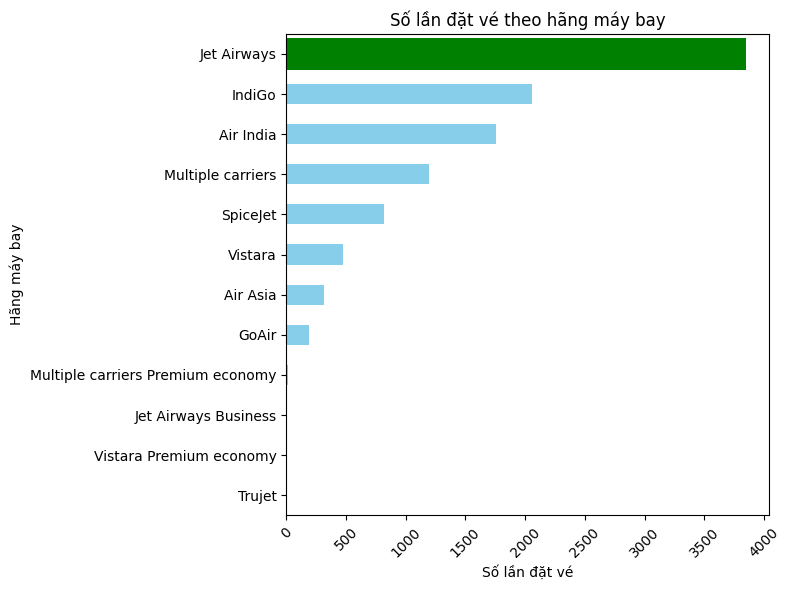

Hãng máy bay được đặt vé nhiều nhất: Jet Airways
Airline
Jet Airways    3850
Name: count, dtype: int64
Hãng máy bay được đặt vé ít nhất: Trujet
Airline
Trujet    1
Name: count, dtype: int64


In [58]:
# Phân tích hãng máy bay được đặt vé nhiều nhất và ít nhất
airline_counts = data_train['Airline'].value_counts().sort_values()
most_booked_airline = airline_counts.idxmax()
least_booked_airline = airline_counts.idxmin()
n = len(airline_counts) - 1
# Trực quan hóa số lần đặt vé của các hãng máy bay
plt.figure(figsize=(8, 6))
airline_counts.plot(kind='barh', color='skyblue')
plt.title('Số lần đặt vé theo hãng máy bay')
plt.barh(n, airline_counts.iloc[n], color='green')
plt.xlabel('Số lần đặt vé')
plt.ylabel('Hãng máy bay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f'Hãng máy bay được đặt vé nhiều nhất: {most_booked_airline}')
print(most_booked_airlines)
print(f'Hãng máy bay được đặt vé ít nhất: {least_booked_airline}')
print(least_booked_airlines)


#### **5. Tháng cao điểm?**

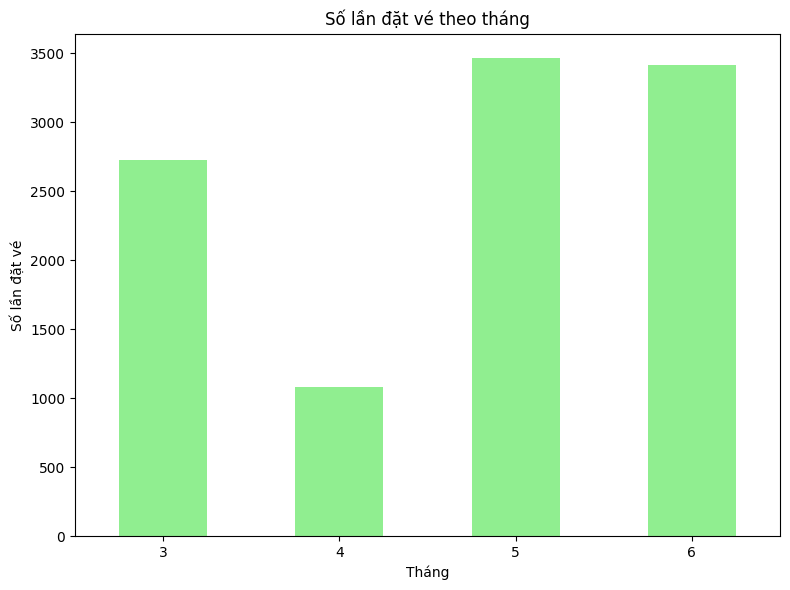

Tháng cao điểm là tháng số: 5


In [60]:
# Phân tích tháng là tháng cao điểm
data_train['Date_of_Journey'] = pd.to_datetime(data_train['Date_of_Journey'])
data_train['Month'] = data_train['Date_of_Journey'].dt.month

month_counts = data_train['Month'].value_counts().sort_index()

# Trực quan hóa số lần đặt vé theo tháng
plt.figure(figsize=(8, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Số lần đặt vé theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lần đặt vé')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

peak_month = month_counts.idxmax()
print(f'Tháng cao điểm là tháng số: {peak_month}')